In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import fftpack
from scipy import signal
import numpy as np
import pandas as pd

In [2]:
cd ~/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL/

/home/takeyama/Documents/01_SensorData/2016_04_12/cleaning-addingLABEL


In [3]:
ls

00_label_data/
20160331_180615.srt
Cleaning-Conv-left-hand-ags.csv
Cleaning-Conv-left-leg-ags.csv
Cleaning-Conv-right-hand-ags.csv
Cleaning-Conv-right-leg-ags.csv
Cleaning-Conv-west-ags.csv
CleaningConv-left-hand-ags.csv
CleaningConv-left-leg-ags.csv
CleaningConv-right-hand-ags.csv
CleaningConv-right-leg-ags.csv
CleaningConv-west-ags.csv
Cleaning_left_hand_ags.csv
Conv-left-hand-ags.csv
Conv-left-hand-batt.csv
Conv-left-leg-ags.csv
Conv-left-leg-batt.csv
Conv-right-hand-ags.csv
Conv-right-hand-batt.csv
Conv-right-leg-ags.csv
Conv-right-leg-batt.csv
Conv-west-ags.csv
Conv-west-batt.csv
DeviceSet1.avi
SP-left-hand-acc.dat
SP-left-hand-acc.dat.cache
SP-left-hand-batt.dat
SP-left-hand-gyr.dat
SP-left-hand-gyr.dat.cache
SP-left-leg-acc.dat
SP-left-leg-acc.dat.cache
SP-left-leg-batt.dat
SP-left-leg-gyr.dat
SP-left-leg-gyr.dat.cache
SP-right-hand-acc.dat
SP-right-hand-acc.dat.cache
SP-right-hand-batt.dat
SP-right-hand-gyr.dat
SP-right-hand-gyr.dat.cache
SP-right-leg-acc.dat
SP-right-leg-acc.d

In [4]:
data = pd.read_csv('Cleaning-Conv-left-hand-ags.csv')

In [5]:
# 歩いている時のスペクトルグラム　→　それぞれが正規分布に基づいていると考える。　→回転時のデータを1つひとつ検定する

In [6]:
left_hand = pd.read_csv('Cleaning-Conv-left-hand-ags.csv')
left_leg = pd.read_csv('Cleaning-Conv-left-leg-ags.csv')
right_hand = pd.read_csv('Cleaning-Conv-right-hand-ags.csv')
right_leg = pd.read_csv('Cleaning-Conv-right-leg-ags.csv')
west = pd.read_csv('Cleaning-Conv-west-ags.csv')

In [8]:
freq, P=signal.welch(data.AccX, 100, nperseg=512)

In [9]:
def OutputPeriodglam(data):
    freq, P=signal.welch(data, 100, nperseg=512)
    plt.figure()
    plt.plot(freq, 10*np.log10(P), "r", linewidth=2, label="test")
    plt.ylim=[-100,100]
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("Power/frequency[dB/Hz]")
    plt.show()
    return freq, P

In [10]:
df=left_hand[left_hand.label=='walking']

/home/takeyama/.pyenv/versions/2.7.11/envs/my_theano/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'IPAexGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


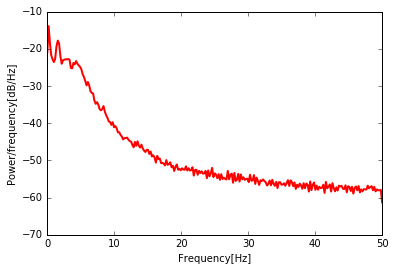

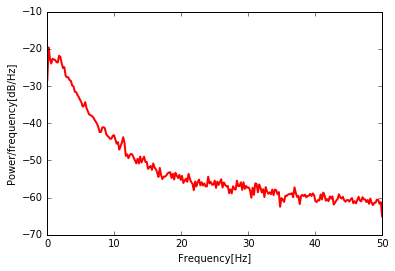

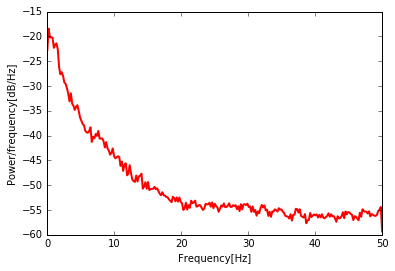

In [11]:
left_hand_freq_x,left_hand_power_x=OutputPeriodglam(df.AccX)
left_hand_freq_y,left_hand_power_y=OutputPeriodglam(df.AccY)
left_hand_freq_z,left_hand_power_z=OutputPeriodglam(df.AccZ)
data=pd.DataFrame({
    'X_freq':left_hand_freq_x,
    'X_power':left_hand_power_x,
    'Y_freq':left_hand_freq_y,
    'Y_power':left_hand_power_y,
    'Z_freq':left_hand_freq_z,
    'Z_power':left_hand_power_z}
)

In [18]:
len(left_hand_freq_x)

257

In [19]:
len(df.AccX)

12348

In [12]:
def MakeSpectrolDataframe(DataName,label):
    d = pd.read_csv(DataName)
    df=d[d.label==label]
    freq_x,power_x,=OutputPeriodglam(df.AccX)
    freq_y,power_y=OutputPeriodglam(df.AccY)
    freq_z,power_z=OutputPeriodglam(df.AccZ)
    
    return freq_x,power_x,freq_y,power_y,freq_z,power_z

In [13]:
label=['Cleaning-Conv-left-hand-ags.csv','Cleaning-Conv-left-leg-ags.csv','Cleaning-Conv-right-hand-ags.csv',
       'Cleaning-Conv-right-leg-ags.csv','Cleaning-Conv-west-ags.csv']

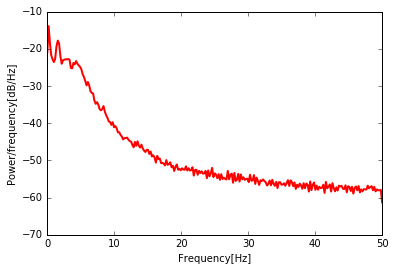

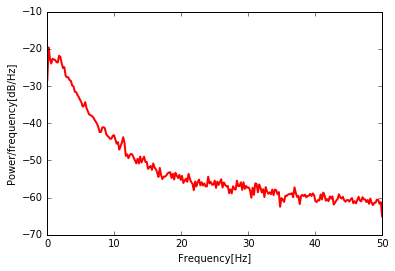

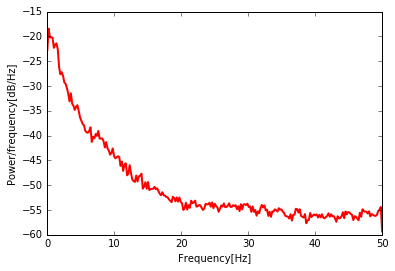

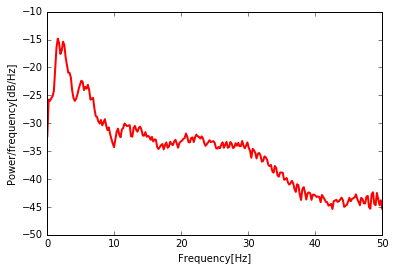

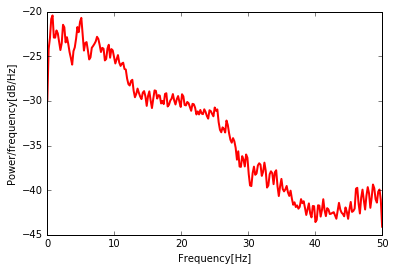

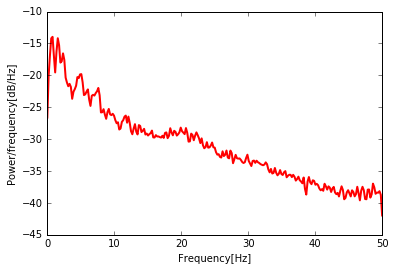

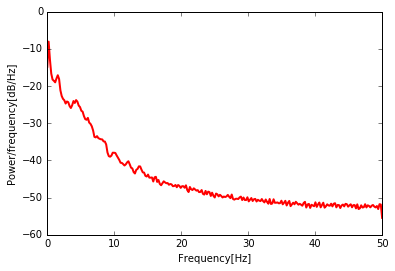

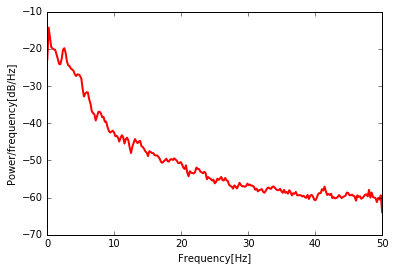

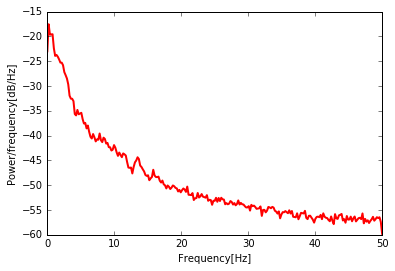

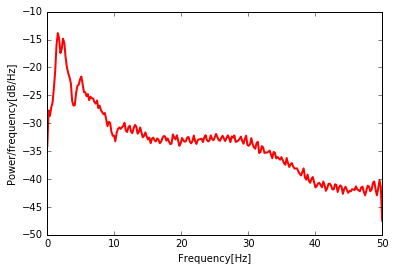

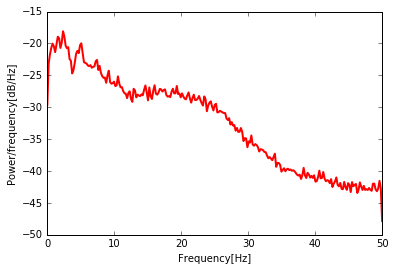

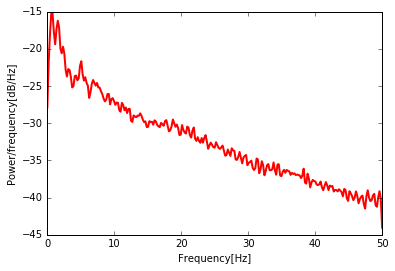

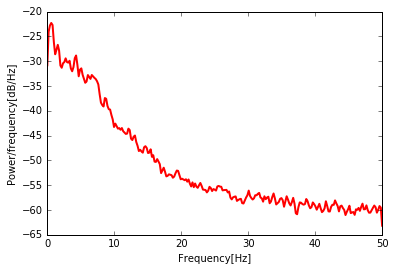

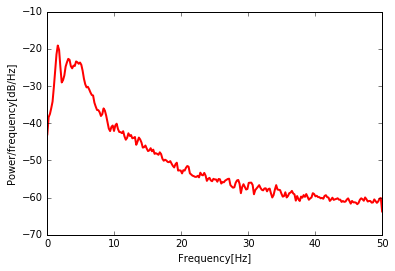

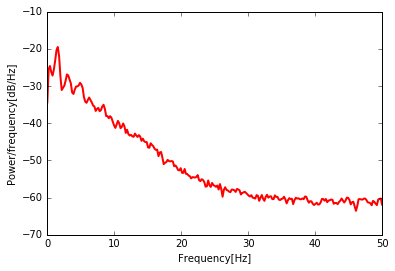

In [14]:
for i in label:
    Sdata=MakeSpectrolDataframe(i,'walking')
    SpecData=pd.DataFrame({
        'X_freq':Sdata[0],
        'X_power':Sdata[1],
        'Y_freq':Sdata[2],
        'Y_power':Sdata[3],
        'Z_freq':Sdata[4],
        'Z_power':Sdata[5]})
    FileName='Spectrol-'+i+'-'+'walking'+'.csv'
    SpecData.to_csv(FileName)